In [1]:
import numpy as np
import pandas as pd
import json
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
data = []
subdirs = [x[1] for x in os.walk('artifacts')][0]
for subdir in subdirs:
    for file in glob.glob(f'artifacts/{subdir}/*'):
        with open(file) as f:
            result = json.load(f)
            if result.get('name') is None:
                result['name'] = subdir
            data.append(result)
data = pd.DataFrame(data)

In [82]:
df = data[data['name'] == 'Frozen Lake Q Learning']
df.dropna(how='all', axis=1, inplace=True)
df

C:\Users\kalie\AppData\Local\Temp\ipykernel_25196\2615673058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how='all', axis=1, inplace=True)


,gamma,wall_time,name,max_iteration,max_steps,average_reward,learning_rate,training_loss,Q
76,0.100000,0.093750,Frozen Lake Q Learning,100.0,100.0,0.000000,0.10000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
77,0.100000,0.046875,Frozen Lake Q Learning,100.0,100.0,0.000000,0.50000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
78,0.100000,0.031250,Frozen Lake Q Learning,100.0,100.0,0.000000,0.90000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
79,0.600000,0.046875,Frozen Lake Q Learning,100.0,100.0,0.000000,0.10000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
80,0.600000,0.046875,Frozen Lake Q Learning,100.0,100.0,0.000000,0.50000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
...,...,...,...,...,...,...,...,...,...
249,0.999990,0.531250,Frozen Lake Q Learning,1000000.0,1000.0,0.009994,0.99999,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[5.99777040292927e-05, 5.997710426424783e-05,..."
250,0.900000,0.531250,Frozen Lake Q Learning,100000.0,1000.0,0.000000,0.99999,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
251,0.999999,0.453125,Frozen Lake Q Learning,100000.0,1000.0,0.000000,0.99999,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0005296629714206626, 0.0005296635010735709..."
252,0.900000,51.203125,Frozen Lake Q Learning,100000.0,100000.0,0.000886,0.99999,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[6.836504648745834e-06, 6.153235469882532e-06..."


In [59]:
df1 = data[data['name'] == 'Frozen Lake Q Learning'][['wall_time', 'average_reward', 'name']]
df1.columns = ['wall_time', 'score', 'name']

df2 = data[data['name'] == 'Frozen Lake Value Iteration Experiment'][['value_iteration_wall_time', 'average_policy_score', 'name']]
df2.columns = ['wall_time', 'score', 'name']

df3 = data[data['name'] == 'Frozen Lake Policy Iteration Experiment'][['wall_time', 'average_test_score', 'name']]
df3.columns = ['wall_time', 'score', 'name']

res = pd.concat([df1, df2, df3])

'Frozen Lake Q Learning'

Text(0.5, 1.0, 'Frozen Lake')

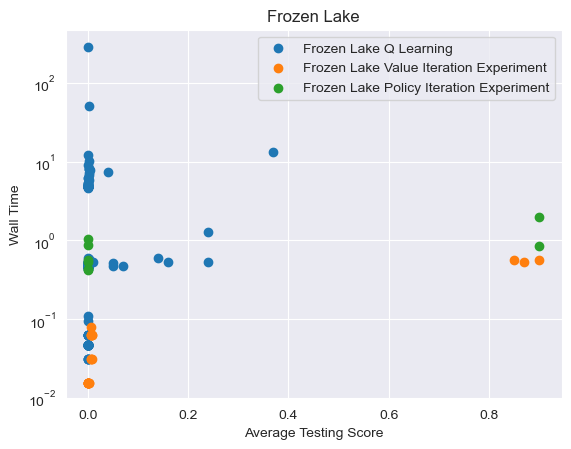

In [73]:
x = df1['score']
y = df1['wall_time']
names = df1['name']
plt.scatter(x, y, label=df1['name'].values[0])

x = df2['score']
y = df2['wall_time']
plt.scatter(x, y, label=df2['name'].values[0])

x = df3['score']
y = df3['wall_time']
plt.scatter(x, y, label=df3['name'].values[0])

# plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylabel('Wall Time')
plt.xlabel('Average Testing Score')

plt.title('Frozen Lake')

In [ ]:
data = []
subdirs = [x[1] for x in os.walk('artifacts')][0]
subdirs = ['frozenlake_v2']
for subdir in subdirs:
    for file in glob.glob(f'artifacts/{subdir}/*'):
        with open(file) as f:
            result = json.load(f)
            if result.get('name') is None:
                result['name'] = subdir
            data.append(result)
data = pd.DataFrame(data)
df = data[data['name'] == 'Frozen Lake Value Iteration Experiment']
df.dropna(how='all', axis=1, inplace=True)
df

Text(0.5, 0, 'Iterations')

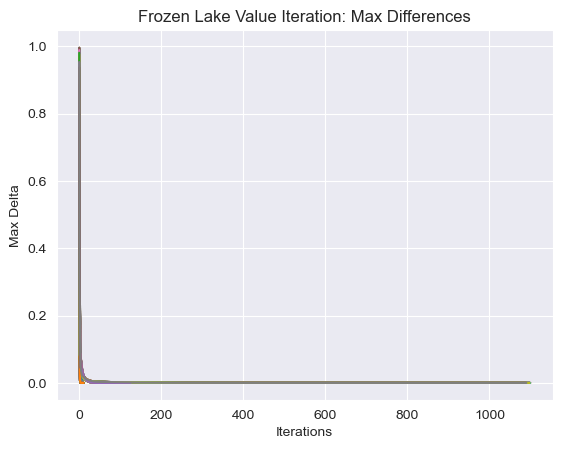

In [18]:
for row in df.iterrows():
    row = row[1]
    data = np.array(row['differences'])
    label=f"γ={row['gamma']}, max_iterations={row['max_iterations']}, epsilon={row['epsilon']}"
    plt.plot(data, label=label)

plt.title('Frozen Lake Value Iteration: Max Differences')
# plt.legend()
plt.ylabel('Max Delta')
plt.xlabel('Iterations')

In [19]:
# place random (left, right, up, down) arrow on each subplot
# using left arrow
left_arrow = u'$\u2190$'
# using right arrow
right_arrow = u'$\u2192$'
# using up arrow
up_arrow = u'$\u2191$'
# using down arrow
down_arrow = u'$\u2193$'

arrows = [left_arrow, down_arrow, right_arrow, up_arrow]

row = df.sort_values('average_policy_score', ascending=False).iloc[0]
policy_list = row.policy
value_list = np.asarray(row.V)
done_states = row.done_states
print(done_states)

# get map of values to their sorted indices
value_map = {v: i/len(row.V) for i, v in enumerate(sorted(value_list))}
value_list = [value_map[v] for v in row.V]
print(value_list)

[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 29, 29, 29, 19, 35, 35, 35, 19, 19, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 41, 41, 41, 42, 42, 35, 42, 35, 35, 35, 35, 35, 35, 35, 35, 35, 29, 29, 29, 46, 46, 46, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 35, 42, 42, 35, 35, 42, 52, 52, 52, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 49, 49, 49, 49, 49, 49, 49, 42, 49, 49, 42, 42, 49, 59, 59, 52, 59, 52, 52, 52, 52, 52, 52, 52, 52, 54, 54, 54, 52, 54, 54, 54, 54, 54, 63, 54, 63, 63, 54, 49, 49, 49, 59, 59, 59, 59, 59, 59, 59, 52, 59, 59, 52, 52, 59, 54, 63, 63, 54, 63, 54, 63, 63, 63, 63, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 29, 29, 29, 19, 35, 35, 35, 19, 19, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 41, 41, 41, 42, 42, 35, 42, 35, 35, 35, 35, 35, 35, 35, 35, 35, 29, 29, 29, 46, 46, 46, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 35, 42, 42, 35, 35, 42, 52, 52, 52, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 49, 49, 49, 49, 49, 49, 49, 42, 49, 49, 42, 42, 49, 59, 59, 52, 59,

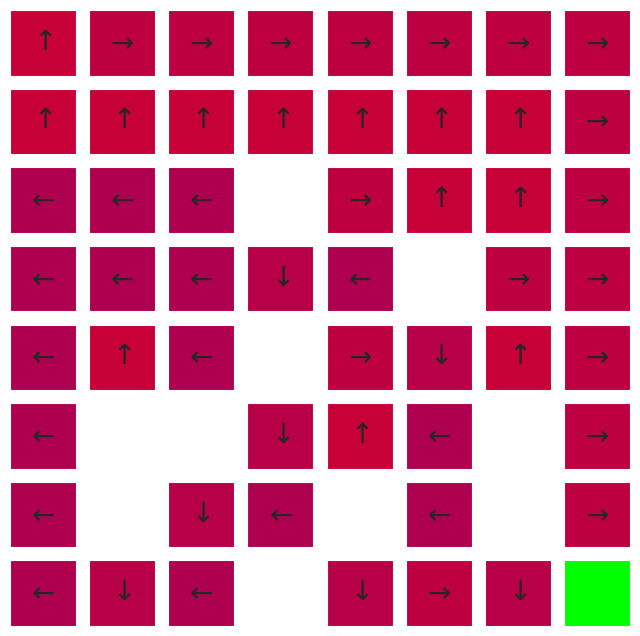

In [83]:
# create 8x8 grid of subplots
fig, ax = plt.subplots(8, 8, figsize=(8, 8))

for i in range(8):
    for j in range(8):
        index = i*8+j
        # random arrow
        # arrow = np.random.choice([left_arrow, right_arrow, up_arrow, down_arrow])
        arrow = arrows[int(policy_list[index])]
        # heat color of box blue to red gradient rgb(0,0,255) to rgb(255,0,0)
        value_percent = value_list[int(policy_list[index])]
        # set background color of subplot
        if i == 7 and j == 7:
            # set background color of last subplot to green
            color = (0, 1, 0)
            ax[i, j].set_facecolor(color)
        elif index in done_states:
            color = (1, 1, 1)
            ax[i, j].set_facecolor(color)
        else:
            color = (value_percent, 0, 1-value_percent)
            ax[i, j].set_facecolor(color)
            # place arrow on subplot
            ax[i, j].text(0.5, 0.5, arrow, fontsize=20, ha='center', va='center')

        # add visible grid lines
        ax[i, j].grid(color='black', linestyle='-', linewidth=1)

        # remove ticks
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.show()

In [21]:
for row in df.iterrows():
    row = row[1]
    data = np.array(row['policy_eval_differences'])
    label=f"γ={row['gamma']}, max_iterations={row['max_iterations']}, epsilon={row['epsilon']}"
    plt.plot(data, label=label)

plt.title('Frozen Lake Policy Iteration: Max Delta vs Iterations')
plt.legend()
plt.ylabel('Max Delta')
plt.xlabel('Iterations')

KeyError: 'policy_eval_differences'

In [ ]:
vals = []
possible_actions = np.arange(-2.0, 2.0, 0.01)
for row_index in range(df.shape[0]):
    row = df.iloc[row_index]
    mean_abs_policy = np.mean(np.abs(list(row['policy'].values())))
    vals.append(mean_abs_policy)

df['policy_mean_abs'] = vals

In [ ]:
vals = []
possible_actions = np.arange(-2.0, 2.0, 0.01)
for row_index in range(df.shape[0]):
    row = df.iloc[row_index]
    rp = []
    for p in row['policy']:
        rp.append(possible_actions[p])
    mean_abs_policy = np.mean(np.abs(rp))
    vals.append(mean_abs_policy)

df['policy_mean_abs'] = vals

In [ ]:
df['wall_time'] = df['policy_time'] + df['value_iteration_wall_time'] + df['policy_score_time']

In [ ]:
# Pendulum Policy Iteration
from src.pendulum_policy_iteration import states
plt.clf()
four_d_map = []
row = df.iloc[0]
for state_index, state in enumerate(states):
    four_d_map.append([state[0], state[1], state[2], row['policy'][str(state_index)]])

four_d_map = np.array(four_d_map)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(four_d_map[:, 0], four_d_map[:, 1], four_d_map[:, 2], c=four_d_map[:, 3], cmap='viridis')
ax.set_xlabel('Pendulum Head X Distance')
ax.set_ylabel('Pendulum Head Y Distance')
ax.set_zlabel('Angular Velocity')
# show legend for action values
m = plt.cm.ScalarMappable(cmap='viridis')
m.set_array(four_d_map[:, 3])
plt.colorbar(m, label='Torque')
plt.gcf().subplots_adjust(right=2)
plt.title('Pendulum Policy Iteration')
plt.savefig('artifacts/output.png')

In [ ]:
# Pendulum Policy Iteration
from src.pendulum_value_iteration import states, possible_actions
plt.clf()
four_d_map = []
row = df.iloc[0]
for state_index, state in enumerate(states):
    four_d_map.append([state[0], state[1], state[2], possible_actions[row['policy'][state_index]]])

four_d_map = np.array(four_d_map)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(four_d_map[:, 0], four_d_map[:, 1], four_d_map[:, 2], c=four_d_map[:, 3], cmap='viridis')
ax.set_xlabel('Pendulum Head X Distance')
ax.set_ylabel('Pendulum Head Y Distance')
ax.set_zlabel('Angular Velocity')
# show legend for action values
m = plt.cm.ScalarMappable(cmap='viridis')
m.set_array(four_d_map[:, 3])
plt.colorbar(m, label='Torque')
plt.gcf().subplots_adjust(right=2)
plt.title('Pendulum Value Iteration')
plt.savefig('artifacts/output.png')

In [75]:
df._get_numeric_data().drop(['value_iteration_wall_time', 'policy_score_time', 'policy_time'], axis=1)

KeyError: "['value_iteration_wall_time', 'policy_score_time', 'policy_time'] not found in axis"

In [79]:
df.groupby(['gamma', 'max_iteration', 'learning_rate']).mean().reset_index().sort_values(by='average_reward', ascending=False).head()

C:\Users\kalie\AppData\Local\Temp\ipykernel_25196\2101614254.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['gamma', 'max_iteration', 'learning_rate']).mean().reset_index().sort_values(by='average_reward', ascending=False).head()


,gamma,max_iteration,learning_rate,wall_time,max_steps,average_reward
44,0.99999,100.0,0.90000,4.562500,3700.0,0.123202
51,0.99999,1000000.0,0.99999,0.369792,700.0,0.083261
50,0.99999,1000000.0,0.90000,0.604167,700.0,0.079911
49,0.99999,1000000.0,0.10000,0.348958,700.0,0.076634
47,0.99999,10000.0,0.90000,0.320312,550.0,0.069919


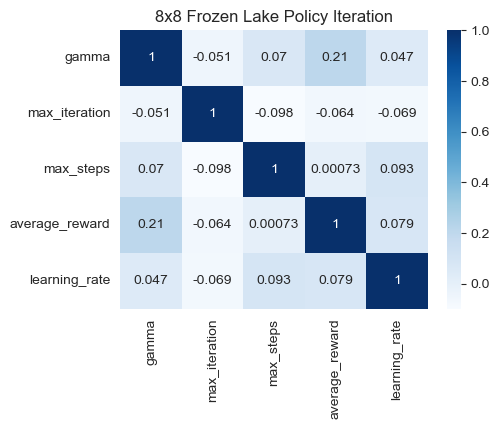

In [80]:
corr = df.drop(['wall_time'], axis=1)._get_numeric_data().corr()

# plot the heatmap
sns.heatmap(corr, cmap="Blues", annot=True)
plt.title('8x8 Frozen Lake Policy Iteration')
plt.savefig('artifacts/output.png')
plt.margins(4)
plt.subplots_adjust(bottom=0.3, left=0.3)

In [ ]:
plt.clf()
gamma_filt = df
for i in range(gamma_filt.shape[0]):
    row = gamma_filt.iloc[i]
    differences = row['training_loss']
    # plot the differences
    plt.plot(differences, label=f"γ={row['gamma']}, max_steps={row['max_steps']}, iterations={row['max_iteration']}")
plt.title('Pendulum Q Learning: Max Delta vs Iterations')
plt.ylabel('Max Delta')
plt.xlabel('Iterations')
# plt.legend()
plt.savefig('artifacts/output.png')